# Polynomial Tessellation

This package creates a smooth, differentiable distance metric for n-d points with a bounded second derivative.

# Usage

The basic usage is to determine the distance from one point to a set of points. The PolynomialTessellation class is optimized for repeated queries against the same collection of points and uses ```scipy.spatial.Voronoi``` to generate a Voronoi digram that is used for fast neighbor lookups.

To control the smoothness of the resulting function, you must provide *either* the $ ratio \in (0, 1) $  or $ c \in (1, \infty) $ parameter. $ c $ represents the maximum allowed eigenvalue of the Hessian, while $ ratio $ controls how much space between the points is devoted to smoothly transitioning between points. With this algorithm, they are related by $ c = ratio / (1 - ratio) $

In [1]:
from src.PolynomialTessellation import PolynomialTessellation, OneDTessellation
import numpy as np
import matplotlib.pyplot as plt

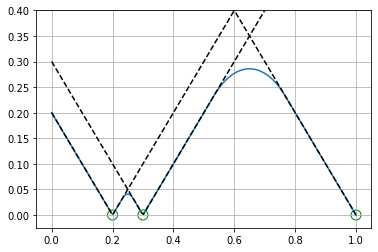

In [2]:
# Specify the control points
mu = np.array([
    [0.2],
    [0.3],
    [1]
])

# Since this is a collection of 1-D points, we use the OneD version
tessellation = OneDTessellation(mu, c = 2)

x = np.linspace(0, 1, 200)
F = []
for _x in x:
    f, _gd, _h = tessellation(_x)
    F.append(f)
F = np.array(F)

fig = plt.figure()
# F is the squared distance between the test point
# and the point collection.
plt.plot(x, np.sqrt(F))
for m in mu:
    # We can draw the distances to each individual point 
    # in black for reference.
    plt.plot(x, np.abs(x - m), color = 'black', linestyle = '--')

# And just to highlight where each point is on the line.
plt.scatter(*mu.T, [0]*len(mu), facecolor = 'none', edgecolors='green', s = 100)
plt.ylim([-0.025, 0.4])
plt.grid()
plt.gcf().patch.set_facecolor('white')
plt.gca().set_facecolor('white')
plt.show()

As described in [[nsert paper reference]], this algorithm can be used to modulate spatial mappings. For example, if you take points in 2-d you can map a flat input space onto workspace to increase the area of input space that maps near target areas in the resulting workspace.

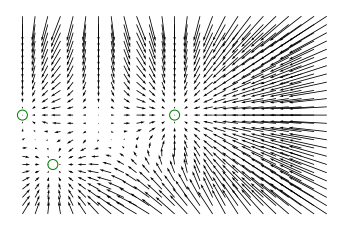

In [4]:
# Specify the target points
mu = np.array([
    [0.5, 0.5],
    [0.0, 0.5],
    [0.1, 0.25]
])
tessellation = PolynomialTessellation(mu, ratio = 0.5)


x = np.linspace(0, 1, 25)

X, Y = np.meshgrid(x, x)
XY = np.column_stack((X.flatten(), Y.flatten()))
dXY = []
for xy in XY:
    _f, gd, _h = tessellation(xy)
    dXY.append(gd / 8) # Can be scaled to modify strength

dXY = np.array(dXY)

plt.figure()
plt.quiver(*XY.T, *dXY.T, angles='xy', scale_units='xy', scale = 1)
plt.scatter(*mu.T, facecolor = 'none', edgecolors='green', s = 100)
plt.axis('off')
plt.gcf().patch.set_facecolor('white')
plt.gca().set_facecolor('white')
plt.show()

